In [6]:
import pandas as pd
import numpy as np
import glob
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# Tags
### Explanation and creation of tags-to-articles dataframe
In order to be able to run this notebook you need to have the `articles.json` file in the same folder. You can get this file by running the "Guardian API - Articles" notebook. The next cell loads in this file into our very familiar dataframe `data`

In [7]:
data = pd.read_json('articles.json')

Okay, so we know that the Guardian manually tags it's articles. Each tag represents a certain (sub)topic and each article can be tagged by multiple of these tags. Running the cell below gives you tags that the first article in `data` has been tagged with and also all the information that these tags contain. Have a quick look around.
As you can see the first article is tagged with 16 tags in total. That means 16 unique topics. Each tag also has a type; for example "Tone", "Keyword" or "Type" (which means the type of article).

In [8]:
pd.json_normalize(data.tags[0])

,id,type,sectionId,sectionName,webTitle,webUrl,apiUrl,references,description,bio,firstName,lastName
0,commentisfree/commentisfree,blog,commentisfree,Opinion,Opinion,https://www.theguardian.com/commentisfree/comm...,https://content.guardianapis.com/commentisfree...,[],NaN,NaN,NaN,NaN
1,society/nhs,keyword,society,Society,NHS,https://www.theguardian.com/society/nhs,https://content.guardianapis.com/society/nhs,[],NaN,NaN,NaN,NaN
2,society/society,keyword,society,Society,Society,https://www.theguardian.com/society/society,https://content.guardianapis.com/society/society,[],NaN,NaN,NaN,NaN
3,politics/boris-johnson,keyword,politics,Politics,Boris Johnson,https://www.theguardian.com/politics/boris-joh...,https://content.guardianapis.com/politics/bori...,[],NaN,NaN,NaN,NaN
4,society/hospitals,keyword,society,Society,Hospitals,https://www.theguardian.com/society/hospitals,https://content.guardianapis.com/society/hospi...,[],The latest news and comment on hospitals,NaN,NaN,NaN
5,society/health,keyword,society,Society,Health,https://www.theguardian.com/society/health,https://content.guardianapis.com/society/health,[],NaN,NaN,NaN,NaN
6,politics/conservatives,keyword,politics,Politics,Conservatives,https://www.theguardian.com/politics/conservat...,https://content.guardianapis.com/politics/cons...,[],NaN,NaN,NaN,NaN
7,politics/general-election-2019,keyword,politics,Politics,General election 2019,https://www.theguardian.com/politics/general-e...,https://content.guardianapis.com/politics/gene...,[],NaN,NaN,NaN,NaN
8,politics/politics,keyword,politics,Politics,Politics,https://www.theguardian.com/politics/politics,https://content.guardianapis.com/politics/poli...,[],<p><br></p>,NaN,NaN,NaN
9,uk/uk,keyword,uk-news,UK news,UK news,https://www.theguardian.com/uk/uk,https://content.guardianapis.com/uk/uk,[],NaN,NaN,NaN,NaN


So next up we want to tags-to-article dataframe, called `tagsToArticle`. This dataframe is row for each tags-article combination. I don't really know how to explain it better than to just demonstrating by running the following cell.

In [9]:
dictinary_list = []
for i in tqdm_notebook(range(len(data.tags))):
    for obj in data.tags[i]:
        obj['article_webPublicationDate'] = data.webPublicationDate[i]
        obj['article_id'] =  data.id[i]
        dictinary_list.append(obj)

tagsToArticle = pd.DataFrame.from_dict(dictinary_list)
tagsToArticle.article_webPublicationDate = pd.to_datetime(tagsToArticle.article_webPublicationDate, unit='ms')
tagsToArticle['publicationDay'] = tagsToArticle.article_webPublicationDate.dt.date


As you can see we have a total of 97,326 tags-to-article links in our dataset. The cell below counts the number of unique tags, identifying 4467 tags in our dataset. The last cell writes `tagsToArticle` to a json file if we want to use it in the future.

In [10]:
tagsToArticle

,id,type,sectionId,sectionName,webTitle,webUrl,apiUrl,references,article_webPublicationDate,article_id,description,bio,firstName,lastName,bylineImageUrl,bylineLargeImageUrl,activeSponsorships,twitterHandle,campaignInformationType,emailAddress,podcast,paidContentType,publicationDay
0,commentisfree/commentisfree,blog,commentisfree,Opinion,Opinion,https://www.theguardian.com/commentisfree/comm...,https://content.guardianapis.com/commentisfree...,[],2019-12-10 17:43:16,commentisfree/2019/dec/10/doctor-johnson-thous...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10
1,society/nhs,keyword,society,Society,NHS,https://www.theguardian.com/society/nhs,https://content.guardianapis.com/society/nhs,[],2019-12-10 17:43:16,commentisfree/2019/dec/10/doctor-johnson-thous...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10
2,society/society,keyword,society,Society,Society,https://www.theguardian.com/society/society,https://content.guardianapis.com/society/society,[],2019-12-10 17:43:16,commentisfree/2019/dec/10/doctor-johnson-thous...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10
3,politics/boris-johnson,keyword,politics,Politics,Boris Johnson,https://www.theguardian.com/politics/boris-joh...,https://content.guardianapis.com/politics/bori...,[],2019-12-10 17:43:16,commentisfree/2019/dec/10/doctor-johnson-thous...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10
4,society/hospitals,keyword,society,Society,Hospitals,https://www.theguardian.com/society/hospitals,https://content.guardianapis.com/society/hospi...,[],2019-12-10 17:43:16,commentisfree/2019/dec/10/doctor-johnson-thous...,The latest news and comment on hospitals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97321,world/world,keyword,world,World news,World news,https://www.theguardian.com/world/world,https://content.guardianapis.com/world/world,[],2020-05-18 10:35:27,world/2020/may/18/forces-allied-to-libyan-gove...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-18
97322,type/article,type,NaN,NaN,Article,https://www.theguardian.com/articles,https://content.guardianapis.com/type/article,[],2020-05-18 10:35:27,world/2020/may/18/forces-allied-to-libyan-gove...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-18
97323,tone/news,tone,NaN,NaN,News,https://www.theguardian.com/tone/news,https://content.guardianapis.com/tone/news,[],2020-05-18 10:35:27,world/2020/may/18/forces-allied-to-libyan-gove...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-18
97324,profile/patrickwintour,contributor,NaN,NaN,Patrick Wintour,https://www.theguardian.com/profile/patrickwin...,https://content.guardianapis.com/profile/patri...,[],2020-05-18 10:35:27,world/2020/may/18/forces-allied-to-libyan-gove...,NaN,<p>Patrick Wintour is diplomatic editor for th...,wintour,,https://static.guim.co.uk/sys-images/Guardian/...,https://uploads.guim.co.uk/2017/10/09/Patrick-...,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-18


In [11]:
print(f'Unique tags (nodes): {len(tagsToArticle.id.unique())}')

Unique tags (nodes): 4467


Let's have a look at these unique tags: A tag can be build up out of multiple layer, each layer divived by a '/'. For example, a tag regarding Boris Johnson stems from the group politics. As can be seen like below. The code in the second cell therefor adds another column to our `tagsToArticle` dataframe, namely `firstLevel` which only specifies the first level of that specific tag in that specific article. Now we can investigate the amount of unique top-levels in the tags. 

In [12]:
tagsToArticle.id.unique()[3]

'politics/boris-johnson'

In [13]:
tagsToArticle.id[tagsToArticle.type=='keyword'].value_counts()[:50]

world/coronavirus-outbreak               5477
uk/uk                                    3632
world/world                              2421
science/infectiousdiseases               1712
politics/politics                        1383
society/society                          1251
business/business                        1243
society/health                           1105
science/science                           863
culture/culture                           728
sport/sport                               715
world/europe-news                         667
society/nhs                               634
politics/boris-johnson                    477
football/football                         424
science/medical-research                  413
business/economics                        369
world/china                               354
us-news/us-news                           336
world/asia-pacific                        333
politics/health                           313
money/money                       

In [14]:
tagsToArticle['firstLevel'] = tagsToArticle.id.str.split('/').str[0]

In [15]:
print(f'Unique top-levels: {len(tagsToArticle.firstLevel.unique())}')

Unique top-levels: 61


In [16]:
tagsToArticle.firstLevel.value_counts()[:50]

world                     13275
profile                    9317
theguardian                7821
tone                       7641
type                       7296
tracking                   7149
business                   5261
society                    5110
uk                         4842
politics                   4583
publication                3870
science                    3488
sport                      1747
campaign                   1565
football                   1349
culture                    1307
money                      1023
education                  1011
environment                1004
media                       857
lifeandstyle                835
commentisfree               784
music                       769
technology                  767
us-news                     690
books                       508
artanddesign                451
film                        437
tv-and-radio                389
stage                       379
global-development          325
uk-news 

It could be that there are more than 2 levels in tags. The code in the cell below looks into this. As we see there are 263 tags that are made out of 3 levels.

In [17]:
pd.Series(tagsToArticle.id.unique()).str.count('/').add(1).value_counts()

2    4204
3     263
dtype: int64

<h2>The 'world/coronavirus-outbreak' tag</h2>
Ofcourse the most interesting tag in our dataset is the 'world/coronavirus-outbreak' tag. This is a keyword tag that tags content on being about the coronavirus outbreak and it belongs the 'world' level. Other tags belonging to the world level are: X and X.  Below we created a graph which shows us how many times this tag has been used.

Text(0, 0.5, 'Frequency')

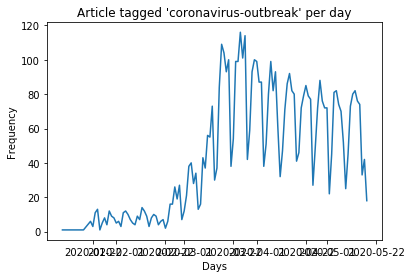

In [25]:
resp = tagsToArticle[tagsToArticle.id=='world/coronavirus-outbreak'].groupby('publicationDay').count().id
resp = resp.sort_index()
plt.plot(resp)
plt.title("Article tagged 'coronavirus-outbreak' per day")
plt.xlabel('Days')
plt.ylabel('Frequency')

In [14]:
# tagsToArticle.to_json('tags_articles.json')